In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore


## compare rms and loudness feats

In [3]:
rms=np.load(f'../data/features/DM_rms.npy')
lla_rms=np.load(f'../data/features/DM_lla_rms.npy')
lla_lufs=np.load(f'../data/features/DM_lla_lufs.npy')

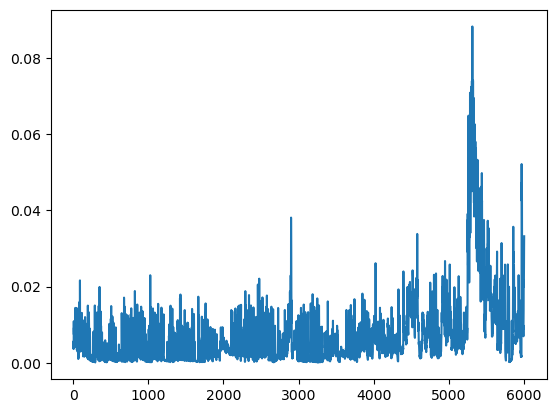

In [4]:
plt.plot(rms)

In [5]:
from scipy.signal import resample
from sklearn.preprocessing import StandardScaler

#print(feature.shape)
# transformer = PCA(n_components=n_components)
scaler = StandardScaler()
# feature=transformer.fit_transform(feature)
rms_scaled = scaler.fit_transform(X=rms,y=None)
#print(feature.shape)
rms_resampled = resample(rms_scaled, 750, axis=0) #resample to 1hz for now 

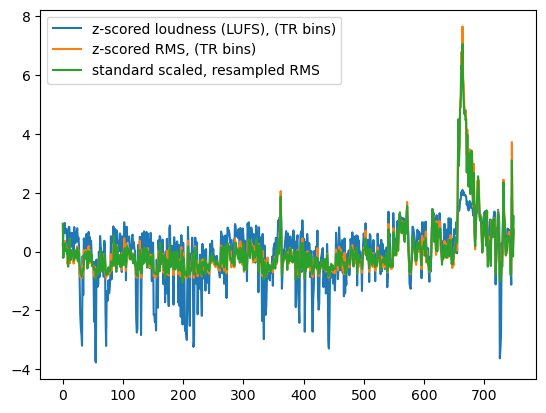

In [6]:
#plt.plot(lla_rms)

# Calculate the z-scores
zscored_lla_lufs = zscore(lla_lufs)
zscored_lla_rms = zscore(lla_rms)
plt.plot(zscored_lla_lufs,label='z-scored loudness (LUFS), (TR bins)')
plt.plot(zscored_lla_rms,label='z-scored RMS, (TR bins)')
plt.plot(rms_resampled,label='standard scaled, resampled RMS')
plt.legend()

# prepare the LLA features

In [7]:
import hrf_tools
zscored_lla_lufs_hrf=zscored_lla_lufs.copy()
hz=zscored_lla_lufs_hrf.shape[0]/600 #703 seconds in friends
zscored_lla_lufs_hrf=hrf_tools.apply_optimal_hrf_10hz(zscored_lla_lufs_hrf.reshape(-1, 1),hz)

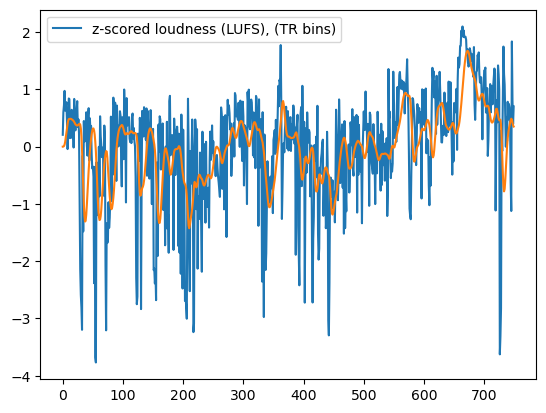

In [44]:
plt.plot(zscored_lla_lufs,label='z-scored loudness (LUFS), (TR bins)')
plt.plot(zscored_lla_lufs_hrf)

plt.legend()

In [8]:
zscored_lla_lufs_hrf.shape

(750, 1)

In [ ]:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

## load first pilots r2
#for fd_thresh in [0.7,0.5,0.3]:

for sub in good_subjects_list:
    #print(f'SUB-{sub} NO V1******************')
    # %run pilot.py -s $sub -p A1 -f lla_lufs -d 0 -r
    %run pilot.py -s $sub -p A1 -f lla_rms -d 0 -r
    %run pilot.py -s $sub -p A1 -f lla_lufs_rms -d 0 -r





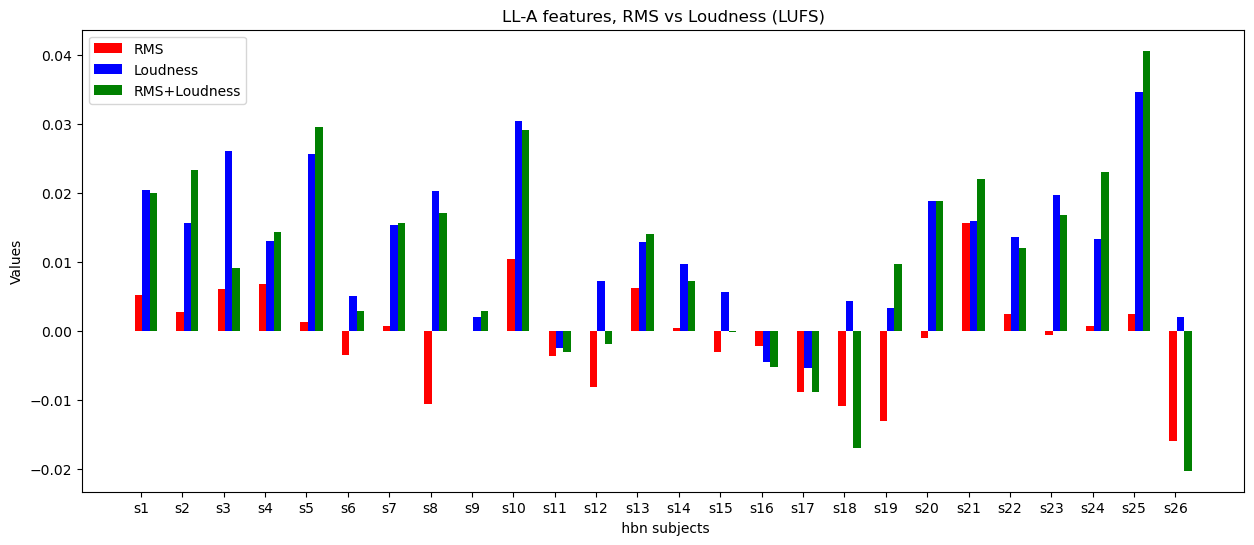

/tmp/ipykernel_937115/1180940904.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


[Text(0, 0, 'RMS'), Text(1, 0, 'Loudness'), Text(2, 0, 'RMS+Loudness')]

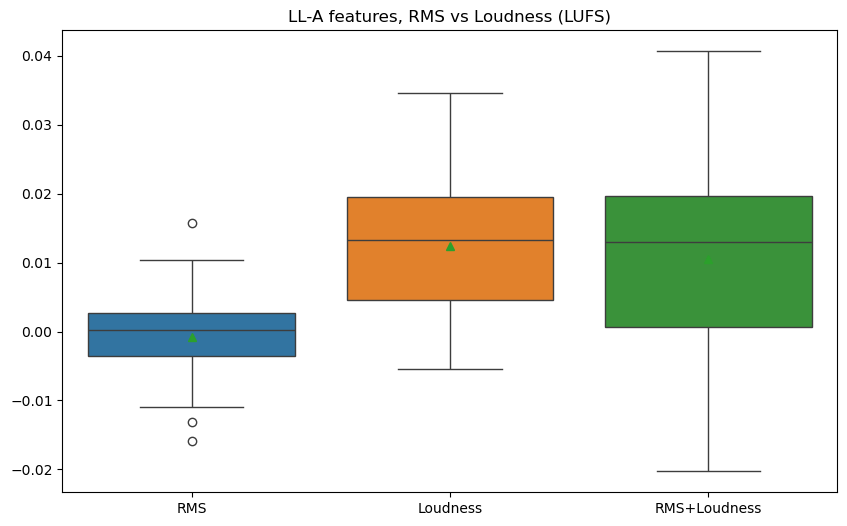

In [16]:
rms=[]
#rms_train=[]
lufs=[]
rms_lufs=[]
#r2_new_train=[]

for sub in good_subjects_list:
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-A1_feat-lla_rms_delay-0_ridgecv.npz')
    rms.append(np.mean(loaded['stacked_r2s']))
    
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-A1_feat-lla_lufs_delay-0_ridgecv.npz')
    lufs.append(np.mean(loaded['stacked_r2s']))
    
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-A1_feat-lla_lufs_rms_delay-0_ridgecv.npz')
    rms_lufs.append(np.mean(loaded['stacked_r2s']))


title='LL-A features, RMS vs Loudness (LUFS)'

# Number of groups
N = len(rms)

# List of all lists
#data = [[f/max(r2_list_sorted) for f in r2_list_sorted], [f/max(noise_ceiling_sorted) for f in noise_ceiling_sorted], [f/max(mriqc_fd_mean_list_sorted) for f in mriqc_fd_mean_list_sorted], [f/max(mean_fd_sorted) for f in mean_fd_sorted]]
data=[rms,lufs,rms_lufs]


# Number of bars in each group
num_bars = len(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Set the positions of the groups and width of the bars
ind = np.arange(N)
width = 0.18
#labels=['$R^2$',f'Subject Specific Mean Noise Ceiling (r={noise_ceiling_r:.02f})',f'MRIQC mean FD (r={mriqc_fd_mean_list_r:.02f})', f'fMRIPrep Mean FD (r={mean_fd_r:.02f})']
labels=['RMS','Loudness','RMS+Loudness']
# Create bars for each list
alphas=[1,1,1]
colors=['r','b','g']
for i, lst in enumerate(data):
    ax.bar(ind + i*width, lst, width, label=f'{labels[i]}', alpha=alphas[i],color=colors[i])

# Add labels, title, and legend
ax.set_xlabel(' hbn subjects')
ax.set_ylabel('Values')
ax.set_title(title)
ax.set_xticks(ind + width / num_bars)
ax.set_xticklabels([f's{i+1}' for i in range(N)])
ax.legend()

# Show the plot
plt.show()





fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data,showmeans=True)
plt.title(title)
ax.set_xticklabels(labels)

## next take a look at the cochleagram

In [18]:
import pilot
feat_set='cochresnet50mean_layer1_hrf'
X,features=pilot.load_features(feat_set)

In [19]:
X.shape

(749, 13568)

In [20]:
from sklearn.decomposition import PCA
n_components=5
pca = PCA(n_components=n_components)
X=pca.fit_transform( X)
X.shape

(749, 5)

In [1]:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

## load first pilots r2
#for fd_thresh in [0.7,0.5,0.3]:

for sub in good_subjects_list:
    #print(f'SUB-{sub} NO V1******************')
    %run pilot.py -s $sub -p A1 -f lla_cochpca5 -d 0 -r
    %run pilot.py -s $sub -p A1 -f lla_lufs_rms_cochpca5 -d 0 -r

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


running subject NDARWW005GCU
loaded brain data
run ridgecv
No value was passed to args.bootstrap
No value was passed to args.ridgecv_bootstrap
MEAN test R^2 Score:  0.00
3.134779691696167
saving results
MEAN train R^2 Score:  0.04
running subject NDARWW005GCU
loaded brain data
run ridgecv
No value was passed to args.bootstrap
No value was passed to args.ridgecv_bootstrap
MEAN test R^2 Score:  0.03
3.329920530319214
saving results
MEAN train R^2 Score:  0.08
running subject NDARLA226ADX
loaded brain data
run ridgecv
No value was passed to args.bootstrap
No value was passed to args.ridgecv_bootstrap
MEAN test R^2 Score:  0.02
3.144791841506958
saving results
MEAN train R^2 Score:  0.05
running subject NDARLA226ADX
loaded brain data
run ridgecv
No value was passed to args.bootstrap
No value was passed to args.ridgecv_bootstrap
MEAN test R^2 Score:  0.04
3.2875277996063232
saving results
MEAN train R^2 Score:  0.07
running subject NDARYL124VM6
loaded brain data
run ridgecv
No value was pas

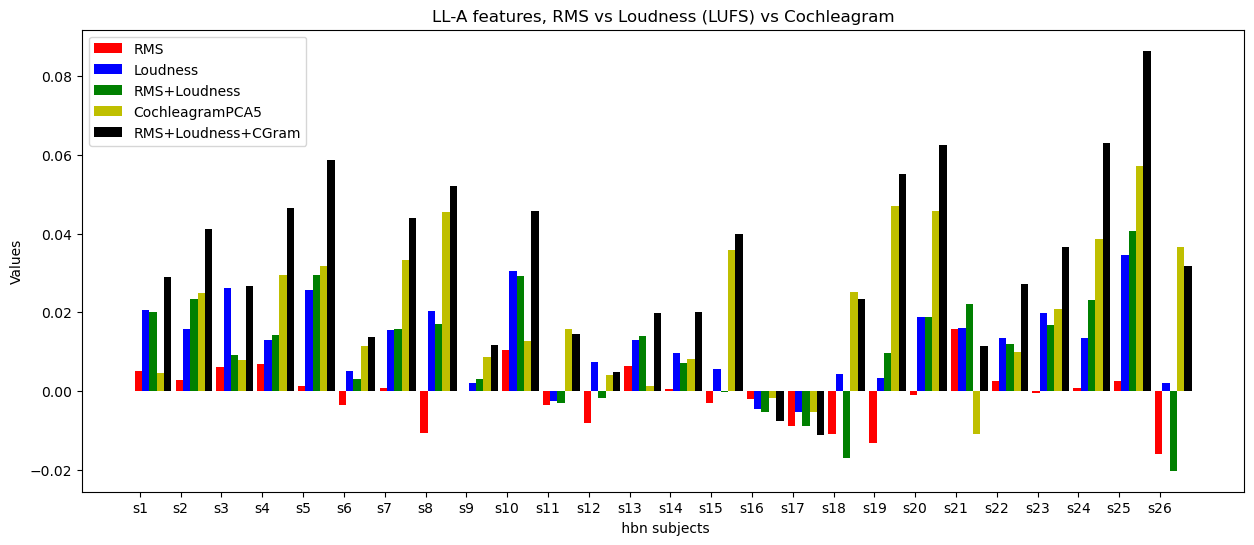

/tmp/ipykernel_940272/3431395470.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


[Text(0, 0, 'RMS'),
 Text(1, 0, 'Loudness'),
 Text(2, 0, 'RMS+Loudness'),
 Text(3, 0, 'CochleagramPCA5'),
 Text(4, 0, 'RMS+Loudness+CGram')]

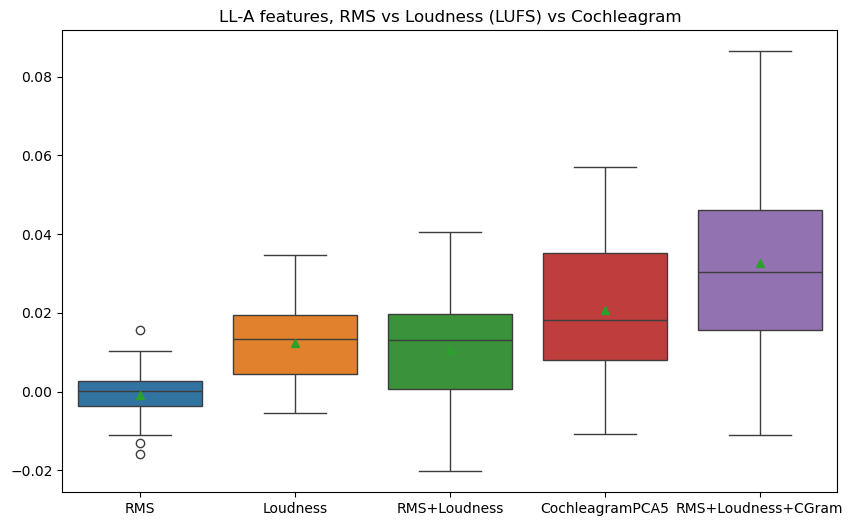

In [6]:
rms=[]
#rms_train=[]
lufs=[]
cochpca5=[]

rms_lufs=[]
rms_lufs_cochpca5=[]
#r2_new_train=[]

for sub in good_subjects_list:
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-A1_feat-lla_rms_delay-0_ridgecv.npz')
    rms.append(np.mean(loaded['stacked_r2s']))
    
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-A1_feat-lla_lufs_delay-0_ridgecv.npz')
    lufs.append(np.mean(loaded['stacked_r2s']))

    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-A1_feat-lla_cochpca5_delay-0_ridgecv.npz')
    cochpca5.append(np.mean(loaded['stacked_r2s']))
    
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-A1_feat-lla_lufs_rms_delay-0_ridgecv.npz')
    rms_lufs.append(np.mean(loaded['stacked_r2s']))
    
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-A1_feat-lla_lufs_rms_cochpca5_delay-0_ridgecv.npz')
    rms_lufs_cochpca5.append(np.mean(loaded['stacked_r2s']))


title='LL-A features, RMS vs Loudness (LUFS) vs Cochleagram'

# Number of groups
N = len(rms)

# List of all lists
#data = [[f/max(r2_list_sorted) for f in r2_list_sorted], [f/max(noise_ceiling_sorted) for f in noise_ceiling_sorted], [f/max(mriqc_fd_mean_list_sorted) for f in mriqc_fd_mean_list_sorted], [f/max(mean_fd_sorted) for f in mean_fd_sorted]]
data=[rms,lufs,rms_lufs,cochpca5,rms_lufs_cochpca5]


# Number of bars in each group
num_bars = len(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Set the positions of the groups and width of the bars
ind = np.arange(N)
width = 0.18
#labels=['$R^2$',f'Subject Specific Mean Noise Ceiling (r={noise_ceiling_r:.02f})',f'MRIQC mean FD (r={mriqc_fd_mean_list_r:.02f})', f'fMRIPrep Mean FD (r={mean_fd_r:.02f})']
labels=['RMS','Loudness','RMS+Loudness','CochleagramPCA5','RMS+Loudness+CGram']
# Create bars for each list
alphas=[1,1,1,1,1]
colors=['r','b','g','y','k']
for i, lst in enumerate(data):
    ax.bar(ind + i*width, lst, width, label=f'{labels[i]}', alpha=alphas[i],color=colors[i])

# Add labels, title, and legend
ax.set_xlabel(' hbn subjects')
ax.set_ylabel('Values')
ax.set_title(title)
ax.set_xticks(ind + width / num_bars)
ax.set_xticklabels([f's{i+1}' for i in range(N)])
ax.legend()

# Show the plot
plt.show()





fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data,showmeans=True)
plt.title(title)
ax.set_xticklabels(labels)